<a href="https://colab.research.google.com/github/sutharimanikanta/Golab/blob/main/Brain_Tumor_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/SartajBhuvaji/Brain-Tumor-Classification-DataSet

Cloning into 'Brain-Tumor-Classification-DataSet'...
remote: Enumerating objects: 3039, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 3039 (delta 0), reused 0 (delta 0), pack-reused 3035
Receiving objects: 100% (3039/3039), 79.25 MiB | 38.32 MiB/s, done.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
import pickle
import time
import numpy as np
import keras.optimizers
from sklearn.metrics import classification_report

In [ ]:
print(tf.__version__)

2.15.0


In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
tensorboard = TensorBoard(log_dir='./logs', histogram_freq=0,
                          write_graph=True, write_images=False)

In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import imutils
import cv2
import PIL.Image
import os
%matplotlib inline

demo_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.05,
    height_shift_range=0.05,
    rescale=1./255,
    shear_range=0.05,
    brightness_range=[0.1, 1.5],
    horizontal_flip=True,
    vertical_flip=True
)

In [ ]:
import os

# Define categories
categories = ["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"]

# Define paths for training and testing data
train_dir = "./data/train"
test_dir = "./data/test"

# Function to create directories
def make_directories(base_dir):
    for category in categories:
        os.makedirs(os.path.join(base_dir, category), exist_ok=True)

# Create directories for training data
make_directories(train_dir)

# Create directory for testing data
os.makedirs(test_dir, exist_ok=True)

In [ ]:
# import os
# import cv2
# from google.colab.patches import cv2_imshow
# import numpy as np
# from sklearn.model_selection import train_test_split
# def cropAndAugmentation():
#     # Augmentation Code
#     IMG_SIZE = 80
#     ADD_PIXELS = 5  # Adjust as needed
#     dim = (IMG_SIZE, IMG_SIZE)
#     cwd = os.getcwd()
#     directory = ["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"]
#     desired_folder = "Brain-Tumor-Classification-DataSet/Training/"

#     # Create copies of the original dataset with different modifications
#     datasets = []
#     for i in range(3):
#         datasets.append([])

#     for input_folder in directory:
#         input_folder_path = os.path.join(cwd, desired_folder + input_folder)
#         if not os.path.exists(input_folder_path):
#             raise FileNotFoundError(f"Input folder {input_folder_path} does not exist.")

#         for img in os.listdir(input_folder_path):
#             image_path = os.path.join(input_folder_path, img)
#             image = cv2.imread(image_path)

#             # Resize images for the three datasets
#             resized_image = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
#             rotated_image = cv2.rotate(resized_image, cv2.ROTATE_90_CLOCKWISE)
#             flipped_image = cv2.flip(resized_image, 1)  # Flip along the vertical direction

#             # Append resized images to datasets
#             datasets[0].append(resized_image)
#             datasets[1].append(rotated_image)
#             datasets[2].append(flipped_image)

#     # Concatenate the three datasets into one
#     concatenated_dataset = np.concatenate(datasets, axis=0)

#     # Split the dataset into training and testing sets
#     X_train, X_test = train_test_split(concatenated_dataset, test_size=0.1, random_state=42)
#     # Create an iterator for training data with augmentation
#     train_iterator = demo_datagen.flow(X_train, batch_size=32, shuffle=True)

#     # Store training and testing data
#     data_dir = "./data"
#     train_dir = os.path.join(data_dir, "train")
#     test_dir = os.path.join(data_dir, "test")

#     os.makedirs(train_dir, exist_ok=True)
#     os.makedirs(test_dir, exist_ok=True)

#     # Store training images
#     for idx, img_batch in enumerate(train_iterator):
#         for img in img_batch:
#             category_folder = directory[idx % len(directory)]
#             img_path = os.path.join(train_dir, category_folder, f"image_{idx}.jpg")
#             os.makedirs(os.path.join(train_dir, category_folder), exist_ok=True)
#             cv2.imwrite(img_path, img)
#             idx += 1  # Increment index for the next image

#         if idx >= len(X_train):  # Stop when all original training images are processed
#             break

#     # Store testing images
#     for idx, img in enumerate(X_test):
#         img_path = os.path.join(test_dir, f"image_{idx}.jpg")
#         cv2.imwrite(img_path, img)
#     # Count total number of images
#     total_images = len(X_train) + len(X_test)
#     print("Total number of images:", total_images)
#     print("Number of training images:", len(X_train))
#     print("Number of testing images:", len(X_test))

#     # print after crop
#   # '''  # Comment this section during execution
#     if flag2==0:
#       plt.figure(figsize=(15,6))
#       plt.imshow(new_image)
#       plt.xticks([])
#       plt.yticks([])
#       plt.title('Step2: After Crop')
#       plt.show()
#      #plot_crops()
#       flag2=1
#   #  '''  #Display crops----------------------------------------------------------
#       #def plot_crops()
#       # '''  # Comment this section during execution
#       plt.figure(figsize=(15,6))
#       plt.subplot(141)
#       plt.imshow(image)
#       plt.xticks([])
#       plt.yticks([])
#       plt.title('Step 1. Get the original image')
#       plt.subplot(142)
#       plt.imshow(img_cnt)
#       plt.xticks([])
#       plt.yticks([])
#       plt.title('Step 2. Find the biggest contour')
#       plt.subplot(143)
#       plt.imshow(img_pnt)
#       plt.xticks([])
#       plt.yticks([])
#       plt.title('Step 3. Find the extreme points')
#       plt.subplot(144)
#       plt.imshow(new_image)
#       plt.xticks([])
#       plt.yticks([])
#       plt.title('Step 4. Crop the image')
#       plt.show()
# # Execute the function
# cropAndAugmentation()


Total number of images: 8610
Number of training images: 7749
Number of testing images: 861


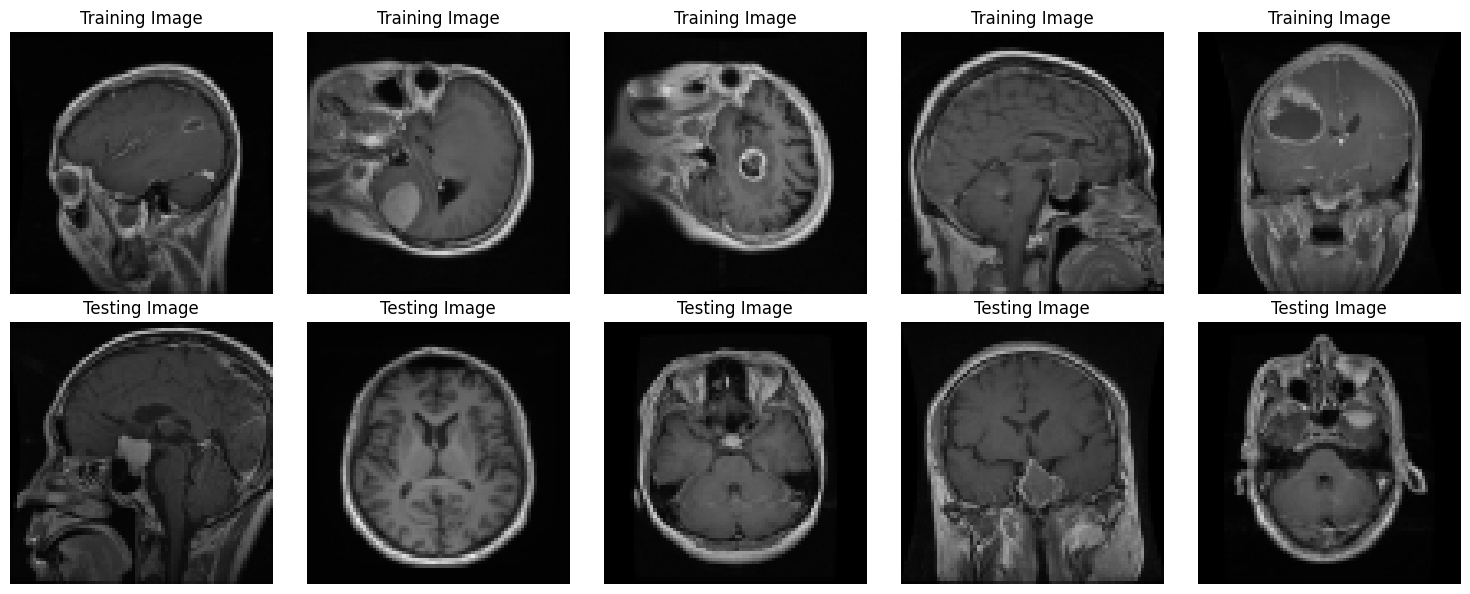

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def cropAndAugmentation():
    # Augmentation Code
    IMG_SIZE = 80
    ADD_PIXELS = 5  # Adjust as needed
    dim = (IMG_SIZE, IMG_SIZE)
    cwd = os.getcwd()
    directory = ["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"]
    desired_folder = "Brain-Tumor-Classification-DataSet/Training/"

    # Create copies of the original dataset with different modifications
    datasets = [[] for _ in range(3)]

    for input_folder in directory:
        input_folder_path = os.path.join(cwd, desired_folder + input_folder)
        if not os.path.exists(input_folder_path):
            raise FileNotFoundError(f"Input folder {input_folder_path} does not exist.")

        for img in os.listdir(input_folder_path):
            image_path = os.path.join(input_folder_path, img)
            image = cv2.imread(image_path)

            # Resize images for the three datasets
            resized_image = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
            rotated_image = cv2.rotate(resized_image, cv2.ROTATE_90_CLOCKWISE)
            flipped_image = cv2.flip(resized_image, 1)  # Flip along the vertical direction

            # Append resized images to datasets
            datasets[0].append(resized_image)
            datasets[1].append(rotated_image)
            datasets[2].append(flipped_image)

    # Concatenate the three datasets into one
    concatenated_dataset = np.concatenate(datasets, axis=0)

    # Split the dataset into training and testing sets
    X_train, X_test = train_test_split(concatenated_dataset, test_size=0.1, random_state=42)

    # Store training and testing data
    data_dir = "./data"
    train_dir = os.path.join(data_dir, "train")
    test_dir = os.path.join(data_dir, "test")

    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    # Store training images
    for idx, img_batch in enumerate(X_train):
        category_folder = directory[idx % len(directory)]
        img_path = os.path.join(train_dir, category_folder, f"image_{idx}.jpg")
        os.makedirs(os.path.join(train_dir, category_folder), exist_ok=True)
        cv2.imwrite(img_path, img_batch)

    # Store testing images
    for idx, img in enumerate(X_test):
        img_path = os.path.join(test_dir, f"image_{idx}.jpg")
        cv2.imwrite(img_path, img)

    # Count total number of images
    total_images = len(X_train) + len(X_test)
    print("Total number of images:", total_images)
    print("Number of training images:", len(X_train))
    print("Number of testing images:", len(X_test))

    # Display images
    plt.figure(figsize=(15, 6))
    for i in range(5):  # Displaying the first 5 images
        plt.subplot(2, 5, i + 1)
        plt.imshow(cv2.cvtColor(X_train[i], cv2.COLOR_BGR2RGB))
        plt.title('Training Image')
        plt.axis('off')

        plt.subplot(2, 5, i + 6)
        plt.imshow(cv2.cvtColor(X_test[i], cv2.COLOR_BGR2RGB))
        plt.title('Testing Image')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Execute the function
cropAndAugmentation()


In [ ]:
TEST_DIR = '/content/data/test' # test data folder
TRAIN_DIR = '/content/data/train' # train data folder
CATEGORIES =["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"]
from tqdm import tqdm
import random


In [ ]:
IMG_SIZE = 150

In [ ]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(TRAIN_DIR, category)  # create path
        class_num = CATEGORIES.index(category)
        for img in tqdm(os.listdir(path), desc=f"Loading {category} images"):
            # iterate over each image per category
            img_path = os.path.join(path, img)
            img_array = cv2.imread(img_path, cv2.IMREAD_COLOR)  # convert to array
            training_data.append(([img_array, class_num]))  # Store both image and category

    random.shuffle(training_data)
    print("Total number of images in training data:", len(training_data))

create_training_data()

Loading pituitary_tumor images: 100%|██████████| 1937/1937 [00:00<00:00, 3568.43it/s]

Total number of images in training data: 7749


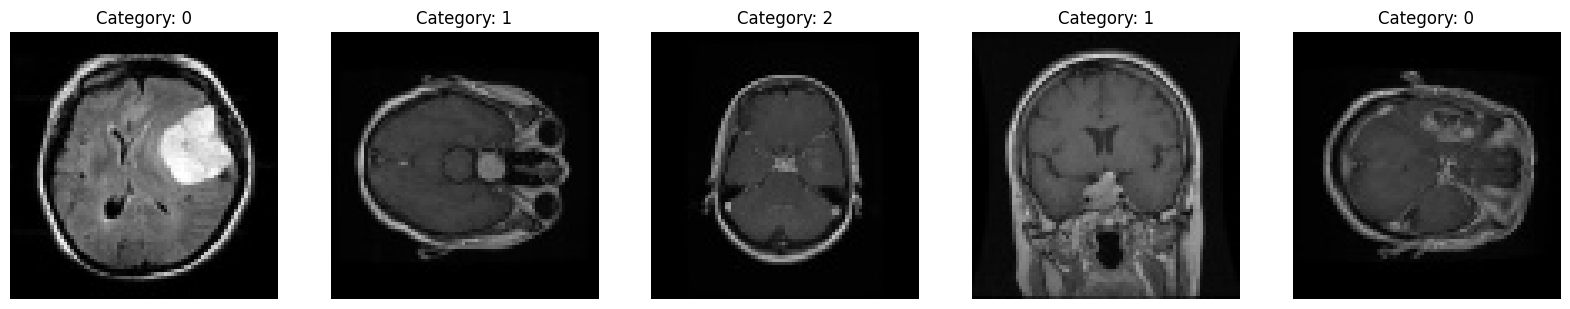

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already imported numpy as np

# Function to display a list of images
def display_images(images):
    fig, axes = plt.subplots(1, len(images), figsize=(20, 10))
    for i, image in enumerate(images):
        axes[i].imshow(cv2.cvtColor(image[0], cv2.COLOR_BGR2RGB))
        axes[i].axis('off')
        axes[i].set_title(f'Category: {image[1]}')
    plt.show()

# Displaying five random images from training data
display_images(training_data[:5])


In [ ]:
# Convert the list of tuples into a single numpy array
training_data_array = np.array(training_data, dtype=object)

# Save the training data array
np.save('train_data.npy', training_data_array)
print(len(training_data_array))
print("train data")
print()


7749
train data



In [ ]:
# X_train = np.array([i[0] for i in training_data]).reshape(-1,IMG_SIZE,IMG_SIZE,3)
# Y_train = [i[1] for i in training_data]# features

In [ ]:
testing_data = []

def create_testing_data():
    for img in tqdm(os.listdir(TEST_DIR), desc="Loading testing images"):
        img_path = os.path.join(TEST_DIR, img)
        if os.path.isfile(img_path):
            try:
                img_array = cv2.imread(img_path, cv2.IMREAD_COLOR)
                if img_array is not None:
                    # Resize the image to the desired size (e.g., 80x80)
                    img_array = cv2.resize(img_array, (80, 80))
                    testing_data.append(img_array)
                else:
                    print(f"Failed to read image: {img_path}")
            except Exception as e:
                print(f"Error loading image {img_path}: {str(e)}")
        else:
            print(f"Not a file: {img_path}")

    random.shuffle(testing_data)
    print("Total number of images in testing data:", len(testing_data))

create_testing_data()

Loading testing images: 100%|██████████| 861/861 [00:00<00:00, 3290.41it/s]

Total number of images in testing data: 861


In [ ]:
# Convert the list of tuples into a single numpy array
testing_data_array = np.array(testing_data, dtype=object)

# Save the training data array
np.save('test_data.npy', training_data_array)
print(len(testing_data))
print("test data")
print()


861
test data



In [ ]:
# Convert to NumPy array
X_train = np.array([i[0] for i in training_data])
Y_train = np.array([i[1] for i in training_data])
# Convert to NumPy array
X_test = np.array([i[0] for i in testing_data])
Y_test = np.array([i[1] for i in testing_data])

In [ ]:
import numpy as np

# # Reshape and convert training data************************************************
# X_train = np.array([cv2.resize(img, (80, 80)) for img in X_train])
# X_train = X_train.reshape(-1, 80, 80, 3)  # Reshape to add the channel dimension
# Y_train = np.array(Y_train)  # Assuming Y_train contains labels or categories

# # Reshape and convert testing data
# X_test = np.array([cv2.resize(img, (80, 80)) for img in X_test])
# X_test = X_test.reshape(-1, 80, 80, 3)  # Reshape to add the channel dimension
# Y_test = np.array(Y_test)  # Assuming Y_test contains labels or categories
X_train_resized = X_train / 255.0
X_test_resized = X_test / 255.0


In [ ]:
# import os
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt

# # Function to read and preprocess images
# def read_and_preprocess_images(test_directories, num_images_per_category=1, image_size=(80, 80)):
#     images = []  # List to store images for each category
#     for category_list in test_directories:
#         category_images = []  # List to store images for a single category
#         for category_path in category_list:
#             for filename in os.listdir(category_path)[:num_images_per_category]:
#                 img_path = os.path.join(category_path, filename)
#                 img = cv2.imread(img_path)
#                 img = cv2.resize(img, image_size)
#                 category_images.append(img)  # Append preprocessed image
#         images.append(category_images)  # Append images for the category
#     return images

# # Test directories (list of lists)
# test_directories = [
#     ["/path/to/your/test_dataset_folder/glioma_tumor"],
#     ["/path/to/your/test_dataset_folder/meningioma_tumor"],
#     ["/path/to/your/test_dataset_folder/no_tumor"],
#     ["/path/to/your/test_dataset_folder/pituitary_tumor"]
# ]

# # Load sample images from each category within the test directories
# sample_images = read_and_preprocess_images(test_directories)

# # Function to display sample images
# def display_sample_images(sample_images):
#     num_categories = len(sample_images)
#     plt.figure(figsize=(12, 6))
#     for i, category_images in enumerate(sample_images, start=1):
#         num_images = len(category_images)
#         for j, img in enumerate(category_images, start=1):
#             plt.subplot(num_categories, num_images, (i-1)*num_images + j)
#             plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#             plt.title(f"Category {i}, Image {j}")
#             plt.axis('off')
#     plt.tight_layout()
#     plt.show()

# # Display sample images from each category
# display_sample_images(sample_images)


FileNotFoundError: [Errno 2] No such file or directory: '/path/to/your/test_dataset_folder/glioma_tumor'

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras import Model
from tensorflow.keras import layers
from tensorflow.keras.layers import UpSampling2D
from tensorflow.keras.layers import BatchNormalization
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Activation, Dropout
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
import time
import numpy as np
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.optimizers import Adam




In [ ]:
# import tensorflow as tf
# from tensorflow.keras import layers, Model, optimizers
# import matplotlib.pyplot as plt
# import numpy as np

# class Autoencoder(Model):
#     def __init__(self, latent_dim, shape):
#         super(Autoencoder, self).__init__()  # Call super().__init__()
#         self.latent_dim = latent_dim
#         self.shape = shape
#         self.encoder = tf.keras.Sequential([
#             layers.InputLayer(input_shape=shape),
#             layers.Conv2D(128, (2, 2), activation='relu', padding='same'),
#             layers.BatchNormalization(),
#             layers.Conv2D(128, (2, 2), activation='relu', padding='same'),
#             layers.BatchNormalization(),
#             layers.MaxPooling2D((2, 2)),
#             layers.Dropout(0.1),
#             layers.Conv2D(64, (2, 2), activation='relu', padding='same'),
#             layers.BatchNormalization(),
#             layers.Conv2D(64, (2, 2), activation='relu', padding='same'),
#             layers.BatchNormalization(),
#             layers.MaxPooling2D((2, 2)),
#             layers.Dropout(0.1),
#             layers.Conv2D(32, (2, 2), activation='relu', padding='same'),
#             layers.MaxPooling2D((2, 2)),
#             layers.BatchNormalization(),
#             layers.UpSampling2D((2, 2))  # Adjusted to match the input shape
#         ])
#         self.decoder = tf.keras.Sequential([
#             layers.Conv2DTranspose(32, (2, 2), activation='relu', padding='same'),
#             layers.BatchNormalization(),
#             layers.UpSampling2D((2, 2)),  # Adjusted to match the downsampling factor
#             layers.Dropout(0.1),
#             layers.Conv2DTranspose(64, (2, 2), activation='relu', padding='same'),
#             layers.BatchNormalization(),
#             layers.Conv2DTranspose(64, (2, 2), activation='relu', padding='same'),
#             layers.BatchNormalization(),
#             layers.UpSampling2D((2, 2)),  # Adjusted to match the downsampling factor
#             layers.Dropout(0.1),
#             layers.Conv2DTranspose(128, (2, 2), activation='relu', padding='same'),
#             layers.BatchNormalization(),
#             layers.Conv2DTranspose(128, (2, 2), activation='relu', padding='same'),
#             layers.BatchNormalization(),
#             layers.Dropout(0.1),
#             layers.Conv2DTranspose(shape[-1], (3, 3), activation='sigmoid', padding='same')
#         ])
#         self.build((None,) + shape)  # Explicitly build the model

#     def call(self, x):
#         encoded = tf.cast(x, tf.float32)  # Cast input data to float32
#         encoded = self.encoder(encoded)
#         decoded = self.decoder(encoded)
#         return decoded

# # Assuming shape is properly defined as (80, 80, 3)
# shape = (80, 80, 3)
# latent_dim = 4
# autoencoder = Autoencoder(latent_dim, shape)



In [ ]:
# import tensorflow as tf
# from tensorflow.keras import layers, Model

# class Autoencoder(Model):
#     def __init__(self, latent_dim, shape):
#         super(Autoencoder, self).__init__()
#         self.latent_dim = latent_dim
#         self.shape = shape
#         self.encoder = tf.keras.Sequential([
#             layers.InputLayer(input_shape=shape),
#             layers.Conv2D(128, (2, 2), activation='relu', padding='same'),
#             layers.BatchNormalization(),
#             layers.Conv2D(128, (2, 2), activation='relu', padding='same'),
#             layers.BatchNormalization(),
#             layers.MaxPooling2D((2, 2)),
#             layers.Dropout(0.1),
#             layers.Conv2D(64, (2, 2), activation='relu', padding='same'),
#             layers.BatchNormalization(),
#             layers.Conv2D(64, (2, 2), activation='relu', padding='same'),
#             layers.BatchNormalization(),
#             layers.MaxPooling2D((2, 2)),
#             layers.Dropout(0.1),
#             layers.Conv2D(32, (2, 2), activation='relu', padding='same'),
#             layers.MaxPooling2D((2, 2)),
#             layers.BatchNormalization(),
#             layers.UpSampling2D((2, 2))  # Adjusted to match the input shape
#         ])
#         self.decoder = tf.keras.Sequential([
#             layers.Conv2DTranspose(32, (2, 2), activation='relu', padding='same'),
#             layers.BatchNormalization(),
#             layers.UpSampling2D((2, 2)),  # Adjusted to match the downsampling factor
#             layers.Dropout(0.1),
#             layers.Conv2DTranspose(64, (2, 2), activation='relu', padding='same'),
#             layers.BatchNormalization(),
#             layers.Conv2DTranspose(64, (2, 2), activation='relu', padding='same'),
#             layers.BatchNormalization(),
#             layers.UpSampling2D((2, 2)),  # Adjusted to match the downsampling factor
#             layers.Dropout(0.1),
#             layers.Conv2DTranspose(128, (2, 2), activation='relu', padding='same'),
#             layers.BatchNormalization(),
#             layers.Conv2DTranspose(128, (2, 2), activation='relu', padding='same'),
#             layers.BatchNormalization(),
#             layers.Dropout(0.1),
#             layers.Conv2DTranspose(shape[-1], (3, 3), activation='sigmoid', padding='same')
#         ])
#         self.build((None,) + shape)

#     def call(self, x):
#         encoded = self.encoder(x)
#         decoded = self.decoder(encoded)
#         return decoded


# # Assuming shape is properly defined as (80, 80, 3)
# # Assuming shape is properly defined as (80, 80, 3)
# X_train_shape = (80,80,3)#X_train.shape[1:]   # Update this line with the correct input shape
# latent_dim = 4
# autoencoder = Autoencoder(latent_dim, X_train_shape)


In [ ]:
# import tensorflow as tf

# # Assuming X_train and X_test are properly defined
# X_train_resized = tf.image.resize(X_train, (80, 80))
# X_test_resized = tf.image.resize(X_test, (80, 80))

# Normalize the pixel values to the range [0, 1]


In [ ]:
class Autoencoder(Model):
    def __init__(self, latent_dim, shape):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim
        self.shape = shape

    def build(self, input_shape):
        self.encoder = tf.keras.Sequential([
            layers.InputLayer(input_shape=self.shape),
            layers.Conv2D(128, (2, 2), activation='relu', padding='same'),
            layers.BatchNormalization(),
            layers.Conv2D(128, (2, 2), activation='relu', padding='same'),
            layers.BatchNormalization(),
            layers.MaxPooling2D((2, 2)),
            layers.Dropout(0.1),
            layers.Conv2D(64, (2, 2), activation='relu', padding='same'),
            layers.BatchNormalization(),
            layers.Conv2D(64, (2, 2), activation='relu', padding='same'),
            layers.BatchNormalization(),
            layers.MaxPooling2D((2, 2)),
            layers.Dropout(0.1),
            layers.Conv2D(32, (2, 2), activation='relu', padding='same'),
            layers.MaxPooling2D((2, 2)),
            layers.BatchNormalization(),
            layers.UpSampling2D((2, 2))  # Adjusted to match the input shape
        ])
        self.decoder = tf.keras.Sequential([
            layers.Conv2DTranspose(32, (2, 2), activation='relu', padding='same'),
            layers.BatchNormalization(),
            layers.UpSampling2D((2, 2)),  # Adjusted to match the downsampling factor
            layers.Dropout(0.1),
            layers.Conv2DTranspose(64, (2, 2), activation='relu', padding='same'),
            layers.BatchNormalization(),
            layers.Conv2DTranspose(64, (2, 2), activation='relu', padding='same'),
            layers.BatchNormalization(),
            layers.UpSampling2D((2, 2)),  # Adjusted to match the downsampling factor
            layers.Dropout(0.1),
            layers.Conv2DTranspose(128, (2, 2), activation='relu', padding='same'),
            layers.BatchNormalization(),
            layers.Conv2DTranspose(128, (2, 2), activation='relu', padding='same'),
            layers.BatchNormalization(),
            layers.Dropout(0.1),
            layers.Conv2DTranspose(self.shape[-1], (3, 3), activation='sigmoid', padding='same')
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
X_train_shape = (80,80,3)#X_train.shape[1:]   # Update this line with the correct input shape
latent_dim = 64 #4
autoencoder = Autoencoder(latent_dim, X_train_shape)

In [ ]:
autoencoder.compile(loss='mse',
                          optimizer=Adam(learning_rate=0.1),
                          metrics=['accuracy'],
                          )

In [ ]:
history=autoencoder.fit(X_train, X_train,
                epochs=10,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/10
243/243 [==============================] - 60s 191ms/step - loss: 4164.4678 - accuracy: 0.9815 - val_loss: 204.5792 - val_accuracy: 0.9963
Epoch 2/10
243/243 [==============================] - 43s 178ms/step - loss: 4163.5767 - accuracy: 0.9932 - val_loss: 204.4949 - val_accuracy: 0.9794
Epoch 3/10
243/243 [==============================] - 44s 182ms/step - loss: 4163.5596 - accuracy: 0.9910 - val_loss: 204.3279 - val_accuracy: 0.9791
Epoch 4/10
243/243 [==============================] - 45s 184ms/step - loss: 4163.5562 - accuracy: 0.9935 - val_loss: 204.3727 - val_accuracy: 0.9806
Epoch 5/10
243/243 [==============================] - 44s 183ms/step - loss: 4163.5542 - accuracy: 0.9943 - val_loss: 204.4469 - val_accuracy: 0.9829
Epoch 6/10
243/243 [==============================] - 45s 185ms/step - loss: 4163.5532 - accuracy: 0.9966 - val_loss: 204.4698 - val_accuracy: 0.9892
Epoch 7/10
243/243 [==============================] - 45s 185ms/step - loss: 4163.5508 - accuracy: 0

1/1 [==============================] - 0s 19ms/step


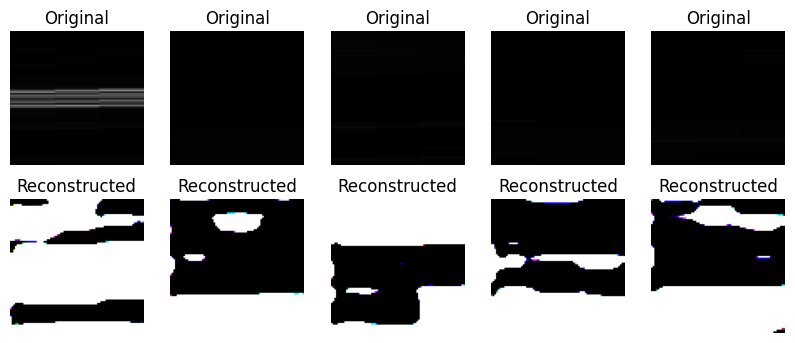

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to display original and reconstructed images
def display_original_and_reconstructed_samples(original_images, reconstructed_images):
    num_samples = min(len(original_images), len(reconstructed_images))
    plt.figure(figsize=(10, 4))
    for i in range(num_samples):
        # Display original image
        plt.subplot(2, num_samples, i + 1)
        plt.imshow(original_images[i])
        plt.title("Original")
        plt.axis('off')

        # Display reconstructed image
        plt.subplot(2, num_samples, num_samples + i + 1)
        plt.imshow(reconstructed_images[i])
        plt.title("Reconstructed")
        plt.axis('off')
    plt.show()

# Select random sample images
indices = np.random.randint(0, len(X_test), size=5)
sample_images = X_test[indices]

# Reconstruct sample images using the autoencoder model
reconstructed_images = autoencoder.predict(sample_images)

# Display original and reconstructed images
display_original_and_reconstructed_samples(sample_images, reconstructed_images)


In [ ]:
# import tensorflow as tf
# from tensorflow.keras import layers, Model
# from tensorflow.keras.optimizers import Adam

# class Autoencoder(Model):
#     def __init__(self, latent_dim, shape):
#         super(Autoencoder, self).__init__()  # Call super().__init__()
#         self.latent_dim = latent_dim
#         self.shape = shape
#         self.encoder = tf.keras.Sequential([
#             layers.InputLayer(input_shape=shape),
#             layers.Conv2D(128, (2, 2), activation='relu', padding='same'),
#             layers.BatchNormalization(),
#             layers.Conv2D(128, (2, 2), activation='relu', padding='same'),
#             layers.BatchNormalization(),
#             layers.MaxPooling2D((2, 2)),
#             layers.Dropout(0.1),
#             layers.Conv2D(64, (2, 2), activation='relu', padding='same'),
#             layers.BatchNormalization(),
#             layers.Conv2D(64, (2, 2), activation='relu', padding='same'),
#             layers.BatchNormalization(),
#             layers.MaxPooling2D((2, 2)),
#             layers.Dropout(0.1),
#             layers.Conv2D(32, (2, 2), activation='relu', padding='same'),
#             layers.MaxPooling2D((2, 2)),
#             layers.BatchNormalization(),
#             layers.UpSampling2D((2, 2))  # Adjusted to match the input shape
#         ])
#         self.decoder = tf.keras.Sequential([
#             layers.Conv2DTranspose(32, (2, 2), activation='relu', padding='same'),
#             layers.BatchNormalization(),
#             layers.UpSampling2D((2, 2)),  # Adjusted to match the downsampling factor
#             layers.Dropout(0.1),
#             layers.Conv2DTranspose(64, (2, 2), activation='relu', padding='same'),
#             layers.BatchNormalization(),
#             layers.Conv2DTranspose(64, (2, 2), activation='relu', padding='same'),
#             layers.BatchNormalization(),
#             layers.UpSampling2D((2, 2)),  # Adjusted to match the downsampling factor
#             layers.Dropout(0.1),
#             layers.Conv2DTranspose(128, (2, 2), activation='relu', padding='same'),
#             layers.BatchNormalization(),
#             layers.Conv2DTranspose(128, (2, 2), activation='relu', padding='same'),
#             layers.BatchNormalization(),
#             layers.Dropout(0.1),
#             layers.Conv2DTranspose(shape[-1], (3, 3), activation='sigmoid', padding='same')
#         ])
#         self.build((None,) + shape)  # Explicitly build the model

#     def call(self, x):
#         encoded = tf.cast(x, tf.float32)  # Cast input data to float32
#         encoded = self.encoder(encoded)
#         decoded = self.decoder(encoded)
#         return decoded

# # Define shape and latent dimension
# shape = (80, 80, 3)
# latent_dim = 4

# # Instantiate autoencoder
# autoencoder = Autoencoder(latent_dim, shape)

# # Compile autoencoder




In [ ]:
# autoencoder.compile(loss='mse',
#                     optimizer=Adam(learning_rate=0.1),
#                     metrics=['accuracy'])

# # Train autoencoder
# history = autoencoder.fit(X_train, X_train,
#                           epochs=5,
#                           shuffle=True,
#                           validation_data=(X_test, X_test))

In [ ]:
import numpy as np

# Encode Training and Testing Data
encoded_train_data = autoencoder.encoder(X_train)
encoded_test_data = autoencoder.encoder(X_test)

# Decode Encoded Data
decoded_train_data = autoencoder.decoder(encoded_train_data)
decoded_test_data = autoencoder.decoder(encoded_test_data)

# Create CNN Dataset with Decoded Images and Labels
cnn_decoded_train_data = list(zip(decoded_train_data, Y_train))
cnn_decoded_test_data = list(zip(decoded_test_data, Y_test))

# Convert to NumPy arrays
cnn_decoded_train_data = np.array(cnn_decoded_train_data)
cnn_decoded_test_data = np.array(cnn_decoded_test_data)

# Verify the shapes
print("Shape of CNN decoded training data:", cnn_decoded_train_data.shape)
print("Shape of CNN decoded testing data:", cnn_decoded_test_data.shape)


ResourceExhaustedError: Exception encountered when calling layer 'conv2d' (type Conv2D).

{{function_node __wrapped__Conv2D_device_/job:localhost/replica:0/task:0/device:GPU:0}} OOM when allocating tensor with shape[7749,80,80,128] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:Conv2D]

Call arguments received by layer 'conv2d' (type Conv2D):
  • inputs=tf.Tensor(shape=(7749, 80, 80, 3), dtype=float32)

In [ ]:
import os
import cv2
import numpy as np

# Function to preprocess input images before sending them to the model
def preprocess_input_images(input_images):
    processed_images = []
    for img in input_images:
        # Resize the image to the desired input shape (e.g., 80x80)
        img = cv2.resize(img, (80, 80))
        # Normalize pixel values to the range [0, 1]
        img = img / 255.0
        processed_images.append(img)
    return np.array(processed_images)

# Function to predict output images using the autoencoder model
def predict_output_images(input_images, autoencoder_model):
    output_images = []
    for img in input_images:
        img = np.expand_dims(img, axis=0)  # Expand dimensions to match model input shape
        reconstructed_img = autoencoder_model.predict(img)  # Predict output image
        output_images.append(reconstructed_img[0])  # Append to the list
    return output_images

# List of input directories and corresponding output directories
input_directories = ["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"]
output_directories = ["glioma_tumor_o", "meningioma_tumor_o", "no_tumor_o", "pituitary_tumor_o"]

# Path to the main directory containing subdirectories
main_directory = "/content/data/train"

# Create a new main folder for the output directories
output_main_directory = "/content/output_data1"
os.makedirs(output_main_directory, exist_ok=True)

# Iterate over each input directory
for input_dir, output_dir in zip(input_directories, output_directories):
    input_path = os.path.join(main_directory, input_dir)
    output_path = os.path.join(output_main_directory, output_dir)

    # Create the output directory if it doesn't exist
    os.makedirs(output_path, exist_ok=True)

    # Iterate over each image in the input directory
    for img_name in os.listdir(input_path):
        img_path = os.path.join(input_path, img_name)
        # Read the input image
        input_img = cv2.imread(img_path)
        # Preprocess the input image
        preprocessed_img = preprocess_input_images([input_img])[0]
        # Predict the output image using the autoencoder model
        output_img = predict_output_images([preprocessed_img], autoencoder)[0]
        # Save the output image
        output_img_path = os.path.join(output_path, img_name)
        cv2.imwrite(output_img_path, output_img)


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 31ms/step


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential

# Define the model architecture using Sequential API
model = Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(80, 80, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.1),

    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),

    layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),

    layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),

    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 80, 80, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 80, 80, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 80, 80, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 80, 80, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 40, 40, 64)        0         
 D)                                                              
                                                        

In [ ]:
y_pred = autoencoder.predict(X_test)

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_pred_classes[1]

9/9 [==============================] - 0s 44ms/step


array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0,

In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:
# Get the confusion matrix
from sklearn.metrics import confusion_matrix

# Assuming Y_test contains true labels and y_pred_classes contains predicted labels
conf_matrix = confusion_matrix(Y_test[:len(y_pred_classes)], y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)


ValueError: unknown is not supported

In [ ]:
scores = autoencoder.evaluate(X_test, X_test)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

9/9 [==============================] - 0s 45ms/step - loss: 204.4372 - accuracy: 0.9830
Test loss: 204.43716430664062
Test accuracy: 0.9830433130264282


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [ ]:
# Split the encoded test data into training and testing sets for each model
encoded_test_data = autoencoder.encoder(X_test)
X_encoded_train, X_encoded_test, y_encoded_train, y_encoded_test = train_test_split(encoded_test_data, Y_test, test_size=0.2, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [287, 861]

In [ ]:
# X_encoded_train = autoencoder.encoder.predict(X_train)
# X_encoded_test = autoencoder.encoder.predict(X_test)

# Now you can use the original data for classification

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
y_pred_knn = knn.predict(X_test)
cm_knn = confusion_matrix(Y_test, y_pred_knn)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)
y_pred_rf = rf.predict(X_test)
cm_rf = confusion_matrix(Y_test, y_pred_rf)

# SVM
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, Y_train)
y_pred_svm = svm.predict(X_test)
cm_svm = confusion_matrix(Y_test, y_pred_svm)

# Logistic Regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, Y_train)
y_pred_lr = lr.predict(X_test)
cm_lr = confusion_matrix(Y_test, y_pred_lr)

# SGD
sgd = SGDClassifier(random_state=42)
sgd.fit(X_train, Y_train)
y_pred_sgd = sgd.predict(X_test)
cm_sgd = confusion_matrix(Y_test, y_pred_sgd)

# MLP
mlp = MLPClassifier(hidden_layer_sizes=(100,), random_state=42)
mlp.fit(X_train, Y_train)
y_pred_mlp = mlp.predict(X_test)
cm_mlp = confusion_matrix(Y_test, y_pred_mlp)


ValueError: Found array with dim 4. KNeighborsClassifier expected <= 2.

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score, recall_score

# Get reconstructed outputs for X_train and X_test
reconstructed_train = autoencoder.predict(X_train)
reconstructed_test = autoencoder.predict(X_test)

# Assuming y_train and y_test contain the true labels for X_train and X_test respectively
# Compute confusion matrix, F1 score, and recall for train and test sets
y_train_pred = np.argmax(reconstructed_train, axis=3).flatten()
y_train_true = np.argmax(X_train, axis=3).flatten()
train_conf_matrix = confusion_matrix(y_train_true, y_train_pred)
train_f1_score = f1_score(y_train_true, y_train_pred, average='weighted')
train_recall = recall_score(y_train_true, y_train_pred, average='weighted')

y_test_pred = np.argmax(reconstructed_test, axis=3).flatten()
y_test_true = np.argmax(X_test, axis=3).flatten()
test_conf_matrix = confusion_matrix(y_test_true, y_test_pred)
test_f1_score = f1_score(y_test_true, y_test_pred, average='weighted')
test_recall = recall_score(y_test_true, y_test_pred, average='weighted')

print("Train Confusion Matrix:")
print(train_conf_matrix)
print("Train F1 Score:", train_f1_score)
print("Train Recall:", train_recall)

print("\nTest Confusion Matrix:")
print(test_conf_matrix)
print("Test F1 Score:", test_f1_score)
print("Test Recall:", test_recall)


9/9 [==============================] - 0s 31ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Confusion Matrix:
[[49401556    68072   123972]
 [       0        0        0]
 [       0        0        0]]
Train F1 Score: 0.9980600666965967
Train Recall: 0.9961276455026455

Test Confusion Matrix:
[[1805603    3334   21022]
 [   3380       9      45]
 [   3360       5      42]]
Test F1 Score: 0.9877812444009905
Test Recall: 0.9830433362369339


In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler

def lr_range_test(X_train, X_test, shape, latent_dim, start_lr, end_lr, batch_size, epochs):
    autoencoder = Autoencoder(latent_dim, shape)

    # Define a learning rate scheduler callback
    def lr_scheduler(epoch, lr):
        return start_lr * (end_lr / start_lr) ** (epoch / epochs)

    # Compile the model with an initial learning rate
    autoencoder.compile(loss='mse', optimizer=Adam(learning_rate=start_lr), metrics=['accuracy'])

    # Define the LearningRateScheduler callback
    lr_callback = LearningRateScheduler(lr_scheduler)

    # Train the model with LR range test
    history = autoencoder.fit(X_train, X_train, epochs=epochs, batch_size=batch_size, shuffle=True,
                               validation_data=(X_test, X_test), callbacks=[lr_callback], verbose=0)

    return history.history['loss'], history.history['accuracy'], autoencoder

# Define LR range test parameters
start_lr = 1e-7
end_lr = 10
batch_size = 32
epochs = 10

# Perform LR range test
losses, accuracies, autoencoder = lr_range_test(X_train, X_test, shape, latent_dim, start_lr, end_lr, batch_size, epochs)

# Plot the learning rate vs. loss curve
learning_rates = start_lr * (end_lr / start_lr) ** (np.arange(epochs) / epochs)
plt.plot(learning_rates, losses)
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning Rate vs. Loss')
plt.show()

# Plot the learning rate vs. accuracy curve
plt.plot(learning_rates, accuracies)
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Learning Rate vs. Accuracy')
plt.show()


NameError: name 'shape' is not defined